In [123]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [169]:
population_width = 100
t_iterations = 70
lmbd = 2
c = 1
a = .9
r = 1
K = 7000

dh = .5
dp = .5

In [125]:
parasites = []
hosts = []
saved_hosts_dists = []
saved_parasites_dists = []
hosts_num = []
parasites_num = []


In [126]:
def initialize(hosts, parasites, saved_hosts_dists, saved_parasites_dists, hosts_num, parasites_num):
    
    parasites.clear()
    hosts.clear()

    saved_parasites_dists.clear()
    saved_hosts_dists.clear()

    hosts_num.clear()
    parasites_num.clear()
    
    parasites.append(
    np.random.rand(population_width, population_width)
    )
    hosts.append(
    np.random.rand(population_width, population_width)
    )

In [127]:
def H_next(t, rieker=False):

    h_star = H_star(t)
    exp = np.exp(-a * P_star(t))

    if not rieker:
        next_H = lmbd * h_star * np.exp(-a * P_star(t))

    else:
        next_H = lmbd * h_star * np.exp(r * (1 - np.sum(hosts[t-1]) / K) - a * P_star(t))
        
    hosts.append(next_H)

def P_next(t, k=None):

    h_star = H_star(t)
    
    next_P = c * h_star * (1 - np.exp(-a * P_star(t)))
    if k and np.sum(next_P) < 5:

        next_P += k * parasites[t-1]
        
    parasites.append(next_P)

def H_star(t):

    kernel_sum_mat = np.zeros_like(hosts[0])
    return (1 - dh) * hosts[t-1] + (dh) * kernel_sum(hosts[t-1], kernel_sum_mat) / 8.

def P_star(t):

    kernel_sum_mat = np.zeros_like(parasites[0])
    return (1 - dp) * parasites[t-1] + (dp/8.) * kernel_sum(parasites[t-1], kernel_sum_mat)
    

In [128]:
def kernel_sum(mat, res):

    mat_width = mat.shape[0] # both dims are equal

    for i in range(0, mat.shape[0]):
        for j in range(0, mat.shape[1]):

            for w in range(-1, 2):
                for h in range(-1 ,2):

                    coord_i = (i + w + mat_width) % mat_width
                    coord_j = (j + h + mat_width) % mat_width
                    res[i][j] += mat[coord_i][coord_j]

    return res



In [142]:
def run_simulation(k=None, rieker=False):


    initialize(hosts, parasites, saved_hosts_dists, saved_parasites_dists, hosts_num, parasites_num)
    for it in range(1, t_iterations+1):

        print("Iteration ", it)
        print("hosts len ", len(hosts))
        print("hosts", np.sum(hosts[it-1]))
        if(it % 4 == 1):

            saved_hosts_dists.append(hosts[it-1])
            saved_parasites_dists.append(parasites[it-1])
            
        hosts_num.append(np.log(np.sum(hosts[it-1])))
        parasites_num.append(np.log(np.sum(parasites[it-1])))
        H_next(it, rieker)
        P_next(it, k)

    



In [143]:
def show_dists(saved_dists):
    dist_fig, axs = plt.subplots(len(saved_dists), figsize=(20,20))
    for idx, saved in enumerate(saved_dists):
        axs[idx].imshow(saved)

In [144]:

def plot_pops():
    x = np.arange(len(hosts_num))
    plt.plot(x, hosts_num, label="hosts")
    plt.plot(x, parasites_num, label="parasites")
    plt.legend()

In [145]:
run_simulation()

Iteration  1
hosts len  1
hosts 4977.763693357043
Iteration  2
hosts len  2
hosts 6598.388881806606
Iteration  3
hosts len  3
hosts 11548.037405533956
Iteration  4
hosts len  4
hosts 21722.535732409313
Iteration  5
hosts len  5
hosts 40196.39167343864
Iteration  6
hosts len  6
hosts 64183.693174829925
Iteration  7
hosts len  7
hosts 53056.9559695208
Iteration  8
hosts len  8
hosts 3393.6647664426546
Iteration  9
hosts len  9
hosts 31.154108952133754
Iteration  10
hosts len  10
hosts 54.24398441507795
Iteration  11
hosts len  11
hosts 115.20083530460239
Iteration  12
hosts len  12
hosts 244.8004252136457
Iteration  13
hosts len  13
hosts 520.2008283746657
Iteration  14
hosts len  14
hosts 1105.4267499016946
Iteration  15
hosts len  15
hosts 2349.031840198666
Iteration  16
hosts len  16
hosts 4991.692658016299
Iteration  17
hosts len  17
hosts 10607.346894503922
Iteration  18
hosts len  18
hosts 22540.612138064826
Iteration  19
hosts len  19
hosts 47898.800702005974
Iteration  20
hosts l

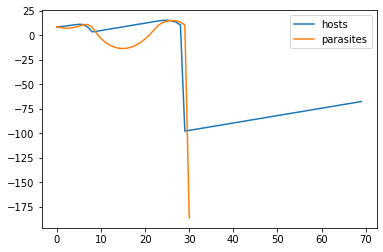

In [146]:
plot_pops()

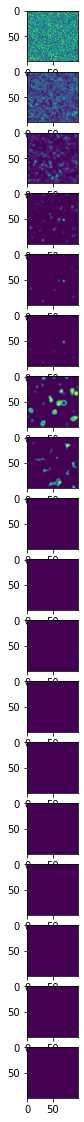

In [147]:
show_dists(saved_parasites_dists)

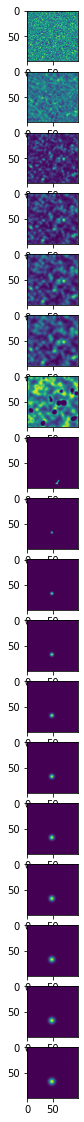

In [148]:
show_dists(saved_hosts_dists)

In [149]:
k = .3
run_simulation(k)

Iteration  1
hosts len  1
hosts 4998.240315685585
Iteration  2
hosts len  2
hosts 6665.673391931028
Iteration  3
hosts len  3
hosts 11680.745804242495
Iteration  4
hosts len  4
hosts 21965.196304482124
Iteration  5
hosts len  5
hosts 40581.108356275254
Iteration  6
hosts len  6
hosts 64433.23824666572
Iteration  7
hosts len  7
hosts 51802.118691267504
Iteration  8
hosts len  8
hosts 3054.856358552156
Iteration  9
hosts len  9
hosts 32.16854058693567
Iteration  10
hosts len  10
hosts 57.090963872782204
Iteration  11
hosts len  11
hosts 121.24799507182837
Iteration  12
hosts len  12
hosts 257.6057347275893
Iteration  13
hosts len  13
hosts 547.3806325066399
Iteration  14
hosts len  14
hosts 1163.1606945653882
Iteration  15
hosts len  15
hosts 2471.6968582082245
Iteration  16
hosts len  16
hosts 5252.334023028119
Iteration  17
hosts len  17
hosts 11161.171564139278
Iteration  18
hosts len  18
hosts 23717.361525836182
Iteration  19
hosts len  19
hosts 50398.47324939799
Iteration  20
hosts 

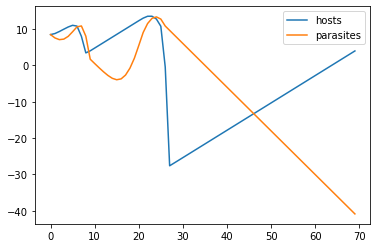

In [150]:
plot_pops()

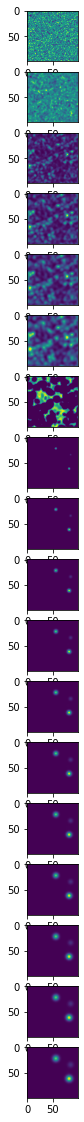

In [151]:
show_dists(saved_hosts_dists)

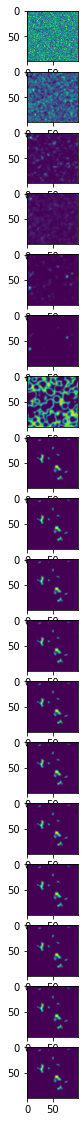

In [152]:
show_dists(saved_parasites_dists)

In [170]:
run_simulation(rieker=True)

Iteration  1
hosts len  1
hosts 5019.017606605929
Iteration  2
hosts len  2
hosts 8865.768426114142
Iteration  3
hosts len  3
hosts 11886.89215650348
Iteration  4
hosts len  4
hosts 10675.406760936072
Iteration  5
hosts len  5
hosts 11149.92455953637
Iteration  6
hosts len  6
hosts 10898.63205185066
Iteration  7
hosts len  7
hosts 11000.649425064055
Iteration  8
hosts len  8
hosts 10965.088221305476
Iteration  9
hosts len  9
hosts 10977.29636399422
Iteration  10
hosts len  10
hosts 10946.35568742095
Iteration  11
hosts len  11
hosts 10915.251440194057
Iteration  12
hosts len  12
hosts 10882.29225033378
Iteration  13
hosts len  13
hosts 10870.047411042575
Iteration  14
hosts len  14
hosts 10882.71674702069
Iteration  15
hosts len  15
hosts 10909.568232866568
Iteration  16
hosts len  16
hosts 10927.577379933091
Iteration  17
hosts len  17
hosts 10922.824370705635
Iteration  18
hosts len  18
hosts 10897.08618400588
Iteration  19
hosts len  19
hosts 10865.145700128383
Iteration  20
hosts l

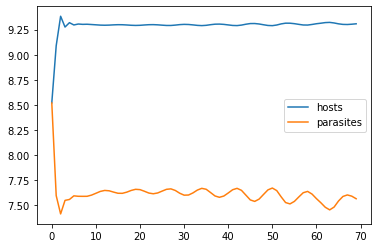

In [171]:
plot_pops()